<a href="https://colab.research.google.com/github/ritikaa05-svg/ai-solve/blob/main/temperature_schedule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

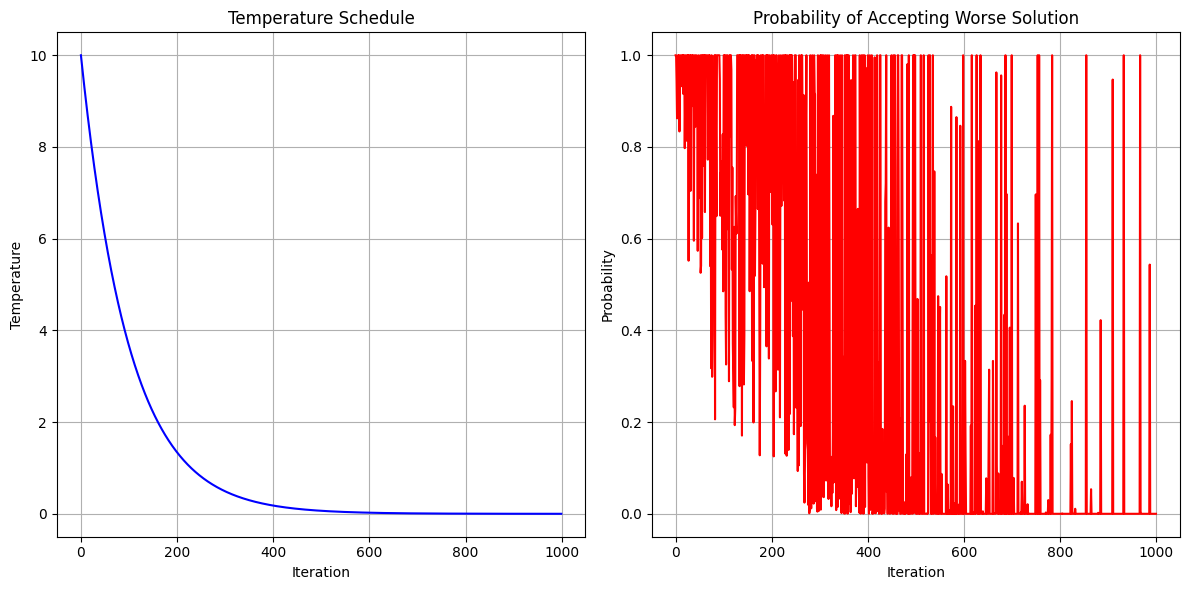

Final solution found at x = -1.3111 with cost = -7.9457


In [1]:
import math
import random
import matplotlib.pyplot as plt

# Define the objective function (f(x) = x^2 + 10*sin(x))
def objective_function(x):
    return x**2 + 10 * math.sin(x)

# Generate a random neighbor by slightly perturbing the current solution
def get_neighbor(x, step_size=0.5):
    return x + random.uniform(-step_size, step_size)

# Simulated Annealing Algorithm
def simulated_annealing(initial_temperature, alpha, max_iterations, step_size=0.5):
    # Start at a random point
    current_x = random.uniform(-10, 10)
    current_cost = objective_function(current_x)

    # Lists to store the results for plotting
    temperatures = []
    probabilities = []

    for t in range(max_iterations):
        # Decrease temperature according to the cooling schedule
        temperature = initial_temperature * (alpha ** t)

        # Generate a neighbor solution
        neighbor_x = get_neighbor(current_x, step_size)
        neighbor_cost = objective_function(neighbor_x)

        # Calculate the cost difference
        cost_diff = neighbor_cost - current_cost

        # Accept the neighbor with a probability based on the temperature
        if cost_diff < 0 or random.random() < math.exp(-cost_diff / temperature):
            current_x = neighbor_x
            current_cost = neighbor_cost

        # Store the temperature and the probability of accepting a worse solution
        temperatures.append(temperature)
        probabilities.append(math.exp(-cost_diff / temperature) if cost_diff > 0 else 1.0)

    return temperatures, probabilities, current_x, current_cost

# Parameters for Simulated Annealing
initial_temperature = 10.0  # Starting temperature
alpha = 0.99  # Cooling rate
max_iterations = 1000  # Number of iterations

# Run simulated annealing with different temperature schedules
temperatures, probabilities, final_x, final_cost = simulated_annealing(initial_temperature, alpha, max_iterations)

# Plot the temperature schedule and probability of accepting worse solutions
plt.figure(figsize=(12, 6))

# Plot temperature schedule
plt.subplot(1, 2, 1)
plt.plot(temperatures, label='Temperature', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.title('Temperature Schedule')
plt.grid(True)

# Plot probability of accepting worse solutions
plt.subplot(1, 2, 2)
plt.plot(probabilities, label='Acceptance Probability', color='red')
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.title('Probability of Accepting Worse Solution')
plt.grid(True)

plt.tight_layout()
plt.show()

# Output the final result
print(f"Final solution found at x = {final_x:.4f} with cost = {final_cost:.4f}")
